In [1]:
import warnings
warnings.filterwarnings("ignore")
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs
from keras.models import Sequential

11493376/11490434 [==============================] - 0s 0us/step
Train Image Shape:  (60000, 28, 28) Train Label Shape:  (60000,)
Test Image Shape:  (10000, 28, 28) Test Label Shape:  (10000,)
Visualizing a random image (11th) from training dataset


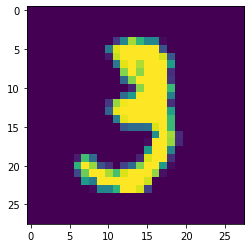

In [2]:
 #Load MNISt dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Check number of samples (60000 in training and 10000 in test)
# Each image has 28 x 28 pixels
print("Train Image Shape: ", train_images.shape, "Train Label Shape: ", train_labels.shape) 
print("Test Image Shape: ", test_images.shape, "Test Label Shape: ", test_labels.shape) 

#  Visualizing a random image (11th) from training dataset
print("Visualizing a random image (11th) from training dataset")
_ = plt.imshow(train_images[10])
# print(type(train_images))
# print(train_images)
# print(train_labels)

In [3]:
# Preprocessing: Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [4]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 75)        33825     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 125)       84500     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 125)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 125)         0

In [5]:
train_images_3d = train_images.reshape(60000,28,28,1)
test_images_3d = test_images.reshape(10000,28,28,1)


# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(train_images_3d, to_categorical(train_labels), epochs=10, batch_size=128,)


Epoch 1/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2252 - accuracy: 0.9270
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0624 - accuracy: 0.9817
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0456 - accuracy: 0.9866
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0370 - accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0313 - accuracy: 0.9905
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0286 - accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0267 - accuracy: 0.9922
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0228 - accuracy: 0.9933
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0200 - accuracy: 0.9941
Epoch 10/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0192 - accura

In [6]:
performance = model.evaluate(test_images_3d, to_categorical(test_labels))
print("Accuracy on Test samples: {0}".format(performance[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0218 - accuracy: 0.9930
Accuracy on Test samples: 0.9929999709129333
